In [1]:
#An introduction to linear and logistic regression using randomly generated data

In [5]:
#1.1 Generating example Regression Data

In [6]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

In [7]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size = n) #generate random variables between "0-1" with a size of 100 - times it by ten so variables are between 1 and 10
y = beta_0 + beta_1*x +ss.norm.rvs(loc=0, scale = 1, size = n) #outcome data #ss.norm random noise - has to be same size as x 

Text(0, 0.5, 'y')

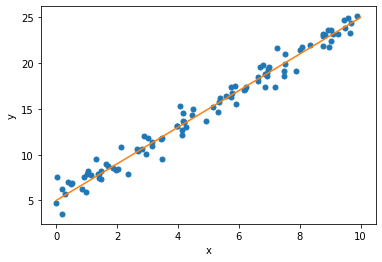

In [8]:
plt.figure()
plt.plot(x,y, "o", ms=5)
xx = np.array([0,10]) #values plot regression data
plt.plot(xx, beta_0 + beta_1 *xx) #deterministic part of model #line
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

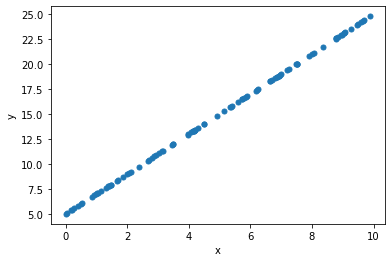

In [9]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size = n) #generate random variables between "0-1" with a size of 100 - times it by ten so variables are between 1 and 10
y = beta_0 + beta_1*x #outcome data #ss.norm random noise - has to be same size as x 
plt.figure()
plt.plot(x,y, "o", ms=5)
plt.xlabel("x")
plt.ylabel("y")

In [10]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

In [11]:
np.mean(x)

4.8587792760014565

In [12]:
np.mean(y)

14.80142786070299

In [13]:
# 1.2 Simple linear regression

#simple regression predict y on the basis of x
#Uppercase Y is random variable, lowercase y is a particular value

In [14]:
def compute_rss(y_estimate, y):  #computes residual sums of sqaures for this regression problem
    return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [15]:
rss

81.540007425512

In [16]:
#Least Squares Estimation in Code

In [17]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size = n) #generate random variables between "0-1" with a size of 100 - times it by ten so variables are between 1 and 10
y = beta_0 + beta_1*x +ss.norm.rvs(loc=0, scale = 1, size = n) #outcome data #ss.norm random noise - has to be same size as x 

In [18]:
import numpy as np

In [19]:
#our goal is to estimate the value of beta 1 and the slope of the line

rss = [] #list of different values of the slopes
slopes = np.arange(-10,15,0.001) #generated numpy array
for slope in slopes: #rss in slopes
    rss.append(np.sum((y - beta_0 - slope * x )**2))

In [20]:
ind_min = np.argmin(rss) #minimum value of an array at a specfic index

In [21]:
print("Estimate for the slope ", slopes[ind_min])

Estimate for the slope  2.003999999993347


Text(0, 0.5, 'RSS')

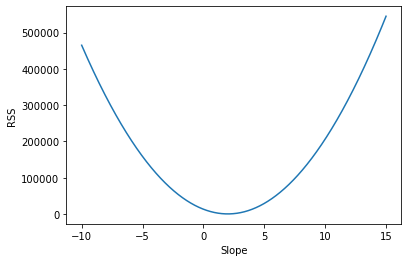

In [22]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

In [23]:
mod = sm.OLS(y, x) #ordinary least squares
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                    1.14e-75
Time:                        15:22:40   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
#mode includes constant intercept term

In [25]:
X = sm.add_constant(x) #constant so not forced through 0
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           7.47e-82
Time:                        15:22:41   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

In [26]:
#sampling distibution of the slope estimates
#if model is useful at all the RSS must be smaller than the TSWS

In [27]:
#1.3 Scikit-learn for Linear Regression

In [28]:
n = 500
beta_0 = 5 #intercept term
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10* ss.uniform.rvs(size=n) #rvs is random variables #distributes values randomly
x_2 = 10* ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0, scale=1, size=n)     #y is the outcome
X = np.stack([x_1, x_2], axis=1) #stack x1 and x2 into a matric variable X, axis = 1 as we want them as columns

Text(0.5, 0, '$y$')

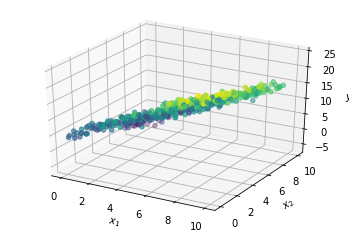

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")


In [30]:
lm = LinearRegression(fit_intercept=True)

In [31]:
lm.fit(X,y) #including intercept because have a non-zero intercept in this data

LinearRegression()

In [32]:
lm.intercept_ #value of estimated intrcept Beta_0

5.154077763777254

In [33]:
lm.coef_[0] #estimate of Beta_1

1.9999378989891399

In [34]:
lm.coef_[1] #estimate of Beta_2

-1.020264486993336

In [35]:
X_0 = np.array([2, 4]) #model object when x1 = 2 and x2 = 4

In [36]:
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

In [37]:
lm.score(X, y) #R squared - how well it works

0.9798997316600129

In [38]:
from sklearn.model_selection import train_test_split #split data into training and test data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1) #train_size is proportion of data to training set

In [40]:
lm = LinearRegression(fit_intercept=True) #creation of model

In [41]:
lm.fit(X_train, y_train) #x is fed data, y is outcomes

LinearRegression()

In [42]:
lm.score(X_test, y_test) #1st argument predictors, 2nd argument true outcomes

0.9794930834681773

In [43]:
#2.1 Generating Example Classification Data

In [44]:
h = 1 #mean
sd = 1 #standard deviation
n = 50
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n) #normally distibuted data
    y1 = ss.norm.rvs(0, sd1, n) #normally distibuted data
    x2 = ss.norm.rvs(h, sd2, n) #normally distibuted data
    y2 = ss.norm.rvs(0, sd2, n) #normally distibuted data
    return (x1, y1, x2, y2)

In [45]:
(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5) #generating data set

In [46]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5) #generating data set

In [47]:
def plot_data(x1, y1, x2, y2): #function to visualise data
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    

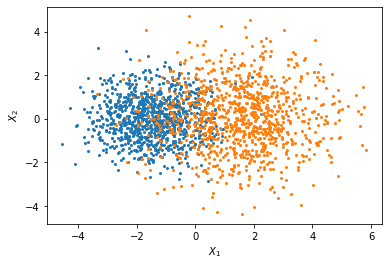

In [48]:
plot_data(x1, y1, x2, y2)

In [49]:
#2.2 Logistic Regression 

In [50]:
def prob_to_odds(p):          #converts probability to odds
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

In [51]:
prob_to_odds(0.8)

4.000000000000001

In [52]:
clf= LogisticRegression()

In [53]:
#y is outcomes
#x is matrix responding to different observations - x1, y1 - x and y coordinates x2 and y2

In [54]:
np.vstack((x1, y1)).T.shape

(1000, 2)

In [55]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))

In [56]:
X.shape #2000 rows and 2 columns

(2000, 2)

In [57]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2, n))) #generate the outcome vector y,

In [58]:
y.shape

(2000,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1) #making a test and train data set

In [60]:
X_train.shape

(1000, 2)

In [61]:
clf.fit(X_train, y_train) #train model

LogisticRegression()

In [62]:
clf.score(X_test, y_test) 

0.889

In [63]:
#estimates of class probabilities - predict_proba function

In [64]:
clf.predict_proba(np.array([-2, 0]).reshape(1,-1)) #proabilities that point belongs to class 1 and class 2 respectfully

array([[0.94996835, 0.05003165]])

In [65]:
clf.predict(np.array([-2, 0]).reshape(1,-1))

array([1])

In [66]:
#Computing Predictive probabilities across the Grid

In [67]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5,0.1), np.arange(-5,5,0.1)) #creation of meshgrid output into two matrices
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()),axis=1)) #xx1 and xx2 into vectors
    Z = probs[:, class_no] #probability that each observation belongs to class 1 or 2
    Z = Z.reshape(xx1.shape) #conditional class probabilities#make into column vector
    CS = ax.contourf(xx1, xx2, Z) 
    cbar = plt.colorbar(CS)
    plt.xlabel('X_1')
    plt.ylabel('X_2')

Text(0.5, 1.0, 'Pred, prob for class 1')

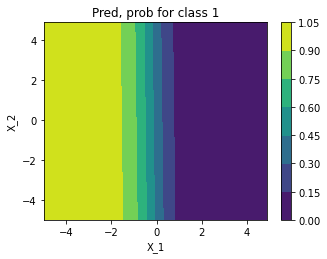

In [68]:
plt.figure(figsize =(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0) #axis object = ax, 
plt.title("Pred, prob for class 1")

Text(0.5, 1.0, 'Pred, prob for class 2')

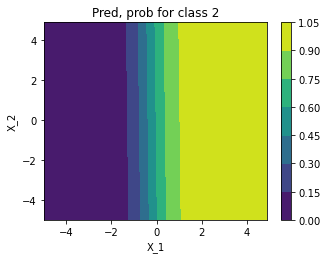

In [69]:
plt.figure(figsize =(5,8))
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred, prob for class 2")